In [1]:
import pickle
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import utils 
%matplotlib inline
  

Using TensorFlow backend.


In [2]:
meta = 'run_new'
corrs_mean_all = {}
corrs_std_all = {}
label_dict = {}

for name in ['all_correlations_MAS_','all_correlations_SI_']:
    all_corrs = {}
    corrs_mean = {}
    corrs_std = {}

    #init
    for seed in np.arange(100,101,1):
        with open(name+meta+str(seed)+'.pickle', 'rb') as f:
            D = pickle.load(f)
        for key1 in D.keys():
            all_corrs[key1] ={}
            corrs_mean[key1] ={}
            corrs_std[key1] ={}
            for key2 in D[key1].keys():
                all_corrs[key1][key2] ={}
                corrs_mean[key1][key2] ={}
                corrs_std[key1][key2] ={}
                for task in range(len(D[key1][key2])):
                    all_corrs[key1][key2][task] = []
                    #corrs_mean[key1][key2][task] = {}
                    #corrs_std[key1][key2][task] = {}

    #fill
    for seed in np.arange(100,101,1):
        with open(name+meta+str(seed)+'.pickle', 'rb') as f:
            D = pickle.load(f)
        for key1 in D.keys():
            for key2 in D[key1].keys():
                for task in range(len(D[key1][key2])):
                    all_corrs[key1][key2][task].append(D[key1][key2][task])


    #summarise  
    for key1 in D.keys():
        for key2 in D[key1].keys():
            for task in range(len(D[key1][key2])):
                corrs_mean[key1][key2][task] = np.mean(all_corrs[key1][key2][task])
                corrs_std[key1][key2][task] = np.std(all_corrs[key1][key2][task])


    corrs_mean_all =   {**corrs_mean_all, **corrs_mean }
    corrs_std_all =   {**corrs_std_all, **corrs_std }
    for kk in D.keys():
        label_dict[kk] = kk
    for kk in label_dict.keys():
        if '-N' in kk:
            label_dict[kk] = kk[:-2]
            label_dict[kk] += '-r'
corrs_mean = corrs_mean_all 
corrs_std = corrs_std_all 
   


label_dict['RSM']  = r'SOS ($\sqrt{v_t}$)'
label_dict['rEWC']  = r'$\sqrt{Fisher}$'
label_dict['AF']  = r'AF'

In [3]:
#see cifar_scatter_plot.ipynb for meaning of RSM, SI-N, etc


plotted_pairs = [('SI', 'RSM'), ('SIB', 'RSM'), ('SIU', 'RSM')]
colors = ['xkcd:blue', 'xkcd:green', 'xkcd:brown']
plot_name = 'SI_SOS'
y_t = [0.0,0.5,1.0]
size = [6,4]

In [5]:
plotted_pairs = [('SI-N', 'RSM'), ('SIB-N', 'RSM'), ('SIU-N', 'RSM')]
colors = ['xkcd:blue', 'xkcd:green', 'xkcd:brown']
plot_name = 'SI_SOS_rescale'
y_t = [0.0,0.5,1.0]
size = [6,4]

In [9]:
plotted_pairs = [('MAS', 'MASX'), ('MAS', 'AF'), ('MAS', 'rEWC')]
colors = ['xkcd:purple', 'xkcd:green', 'xkcd:blue']
plot_name = 'MAS'
y_t = [0.9,1.0]
size = [6,1]

In [16]:
plotted_pairs = [('MAS2', 'MASX2'), ('MAS2', 'AF'), ('MAS2', 'rEWC')]
colors = ['xkcd:purple', 'xkcd:green', 'xkcd:blue']
plot_name = 'MAS2'
y_t = [0,0.5,1.0]
size = [6,4]

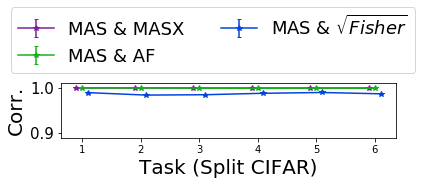

In [10]:
fig, ax = plt.subplots(figsize=size)
fs = 20 #fontsize
save_fig = True


jj = -1
for (a,b), c in zip(plotted_pairs, colors):
    x_axis = np.arange(1,len(corrs_mean[a][b])+1,1)
    y, y_err = [], []
    for task in range(len(x_axis)):
        y.append( corrs_mean[a][b][task] )
        y_err.append( corrs_std[a][b][task]/np.sqrt(5) ) #division by sqrt 5 to turn st-dev into stderr
    label = label_dict[a]+' & ' +label_dict[b]
    ax.errorbar(x_axis+jj*0.1, y, yerr=y_err, capsize=2, fmt='*-', color=c, label=label)
    jj+=1
ax.legend(fontsize=18,loc=[-0.15,1.2],ncol=2)
ax.set_xlabel('Task (Split CIFAR)', fontsize=fs)
ax.set_ylabel('Pearson Corr.', fontsize=fs)
ax.set_ylabel('Corr.', fontsize=fs)
#yticks and axis
ax.set_yticks(y_t)
ax.set_yticklabels(y_t, fontsize=15)
ax.set_ylim([y_t[0]-0.01, y_t[-1]+0.01])
fig.show()

if save_fig:
    path = os.path.expanduser('~/figures/')
    name2 = 'CIFAR_corr_'+plot_name+'.png'
    plt.savefig(path+name2, bbox_inches='tight')



# SI and Controls
To gather data for this, 'correlations_scatter_compare.py' needs to be modified (both HPs and the 'meta' string at the beginning of the file.


In [6]:
corrs_mean_all = {}
corrs_std_all = {}
label_dict = {}
name2 = 'all_correlations_SI_run_new_'

for meta in ['no-re','reg0','']:
    name = name2
    if meta == '':
        name = name2[:-1]
    all_corrs = {}
    corrs_mean = {}
    corrs_std = {}

    #init
    for seed in np.arange(100,101,1):
        with open(name+meta+str(seed)+'.pickle', 'rb') as f:
            D = pickle.load(f)
        for key1 in D.keys():
            all_corrs[key1] ={}
            corrs_mean[key1] ={}
            corrs_std[key1] ={}
            for key2 in D[key1].keys():
                all_corrs[key1][key2] ={}
                corrs_mean[key1][key2] ={}
                corrs_std[key1][key2] ={}
                for task in range(len(D[key1][key2])):
                    all_corrs[key1][key2][task] = []
                    #corrs_mean[key1][key2][task] = {}
                    #corrs_std[key1][key2][task] = {}

    #fill
    for seed in np.arange(100,105,1):
        with open(name+meta+str(seed)+'.pickle', 'rb') as f:
            D = pickle.load(f)
        for key1 in D.keys():
            for key2 in D[key1].keys():
                for task in range(len(D[key1][key2])):
                    all_corrs[key1][key2][task].append(D[key1][key2][task])


    #summarise  
    for key1 in D.keys():
        for key2 in D[key1].keys():
            for task in range(len(D[key1][key2])):
                corrs_mean[key1][key2][task] = np.mean(all_corrs[key1][key2][task])
                corrs_std[key1][key2][task] = np.std(all_corrs[key1][key2][task])


    corrs_mean_all[meta] =   corrs_mean
    corrs_std_all[meta] =   corrs_std
    for kk in D.keys():
        label_dict[kk] = kk
    for kk in label_dict.keys():
        if '-N' in kk:
            label_dict[kk] = kk[:-2]
            label_dict[kk] += '-r'
corrs_mean = corrs_mean_all 
corrs_std = corrs_std_all 
   
label_dict['RSM']  = r'SOS ($\sqrt{v_t}$)'

In [9]:
meta_dict ={'':'SI', 'no-re':'SI(no init)', 'reg0':'SI(c=0)',}
colors_meta = ['xkcd:purple', 'xkcd:grey']
meta_list = ['no-re','reg0']
plot_name = 'SI_SOS_controls_rescale'
y_t = [0.0,0.5,1.0]
size = [6,4]


SI_SOS_controls_rescale


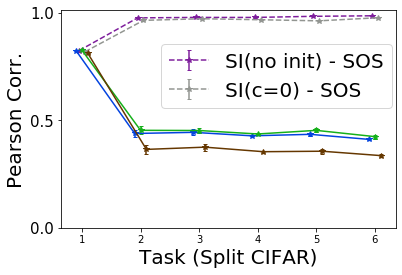

In [10]:
fig, ax = plt.subplots(figsize=size)
fs = 20 #fontsize
save_fig = True


#compare SI to controls
a, b = ('SI-N', 'RSM')
jj = -0.5
for m,c in zip(meta_list, colors_meta):
    x_axis = np.arange(1,len(corrs_mean[m][a][b])+1,1)
    y, y_err = [], []
    for task in range(len(x_axis)):
        y.append( corrs_mean[m][a][b][task] )
        y_err.append( corrs_std[m][a][b][task]/np.sqrt(5) ) #division by sqrt 5 to turn st-dev into stderr
    label = meta_dict[m]+' - SOS' 
    ax.errorbar(x_axis+jj*0.1, y, yerr=y_err, capsize=2, fmt='*--', color=c, label=label)
    jj+=1

 
#normal SI
plotted_pairs = [('SI-N', 'RSM'), ('SIB-N', 'RSM'), ('SIU-N', 'RSM')]
colors = ['xkcd:blue', 'xkcd:green', 'xkcd:brown']
m=''
jj = -1
for (a,b), c in zip(plotted_pairs, colors):
    x_axis = np.arange(1,len(corrs_mean[m][a][b])+1,1)
    y, y_err = [], []
    for task in range(len(x_axis)):
        y.append( corrs_mean[m][a][b][task] )
        y_err.append( corrs_std[m][a][b][task]/np.sqrt(5) ) #division by sqrt 5 to turn st-dev into stderr
    label = label_dict[a]+' - ' +label_dict[b]
    ax.errorbar(x_axis+jj*0.1, y, yerr=y_err, capsize=2, fmt='*-', color=c)
    jj+=1

#legend, labels etc    
ax.legend(fontsize=fs,loc=[0.3,0.55])
ax.set_xlabel('Task (Split CIFAR)', fontsize=fs)
ax.set_ylabel('Pearson Corr.', fontsize=fs)
#yticks and axis
ax.set_yticks(y_t)
ax.set_yticklabels(y_t, fontsize=15)
ax.set_ylim([y_t[0], y_t[-1]+0.01])
fig.show()
print(plot_name)
if save_fig:
    path = os.path.expanduser('~/figures/')
    name2 = 'CIFAR_corr_'+plot_name+'.png'
    plt.savefig(path+name2, bbox_inches='tight')

